## 1. Import Libraries

In [1]:
from gqlalchemy import Memgraph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Connect to MemGraph

Connect to the MemGraph instance running on localhost.

In [2]:
# Connect to MemGraph
memgraph = Memgraph(host='127.0.0.1', port=7687)

# Test connection by dropping all existing data
memgraph.drop_database()

print("[OK] Connected to MemGraph successfully!")

[OK] Connected to MemGraph successfully!


## 3. Create Nodes

Let's create some nodes representing people and their relationships.

In [3]:
# Create person nodes
people = [
    {"name": "Alice", "age": 30, "city": "New York"},
    {"name": "Bob", "age": 35, "city": "San Francisco"},
    {"name": "Charlie", "age": 28, "city": "Seattle"},
    {"name": "Diana", "age": 32, "city": "Boston"},
    {"name": "Eve", "age": 27, "city": "Austin"}
]

for person in people:
    query = f"""
    CREATE (p:Person {{name: '{person['name']}', age: {person['age']}, city: '{person['city']}'}});
    """
    memgraph.execute(query)

print(f"[OK] Created {len(people)} person nodes")

[OK] Created 5 person nodes


## 4. Create Relationships

Now let's create relationships between people.

In [4]:
# Create KNOWS relationships
relationships = [
    ("Alice", "Bob", "colleague"),
    ("Alice", "Charlie", "friend"),
    ("Bob", "Diana", "friend"),
    ("Charlie", "Eve", "colleague"),
    ("Diana", "Eve", "friend"),
    ("Bob", "Charlie", "colleague")
]

for from_person, to_person, rel_type in relationships:
    query = f"""
    MATCH (a:Person {{name: '{from_person}'}}), (b:Person {{name: '{to_person}'}})
    CREATE (a)-[:KNOWS {{type: '{rel_type}'}}]->(b);
    """
    memgraph.execute(query)

print(f"[OK] Created {len(relationships)} relationships")

[OK] Created 6 relationships


## 5. Query Data

Let's run some basic queries to explore the data.

In [5]:
# Get all people
query = "MATCH (p:Person) RETURN p.name as name, p.age as age, p.city as city ORDER BY p.age;"
results = memgraph.execute_and_fetch(query)

df = pd.DataFrame([dict(row) for row in results])
print("All People:")
print(df)

All People:
      name  age           city
0      Eve   27         Austin
1  Charlie   28        Seattle
2    Alice   30       New York
3    Diana   32         Boston
4      Bob   35  San Francisco


In [6]:
# Find Alice's connections
query = """
MATCH (a:Person {name: 'Alice'})-[r:KNOWS]->(b:Person)
RETURN b.name as friend, r.type as relationship_type;
"""
results = memgraph.execute_and_fetch(query)

df = pd.DataFrame([dict(row) for row in results])
print("Alice's connections:")
print(df)

Alice's connections:
    friend relationship_type
0      Bob         colleague
1  Charlie            friend


## 6. Visualize the Graph

Let's visualize our social network using NetworkX and Matplotlib.

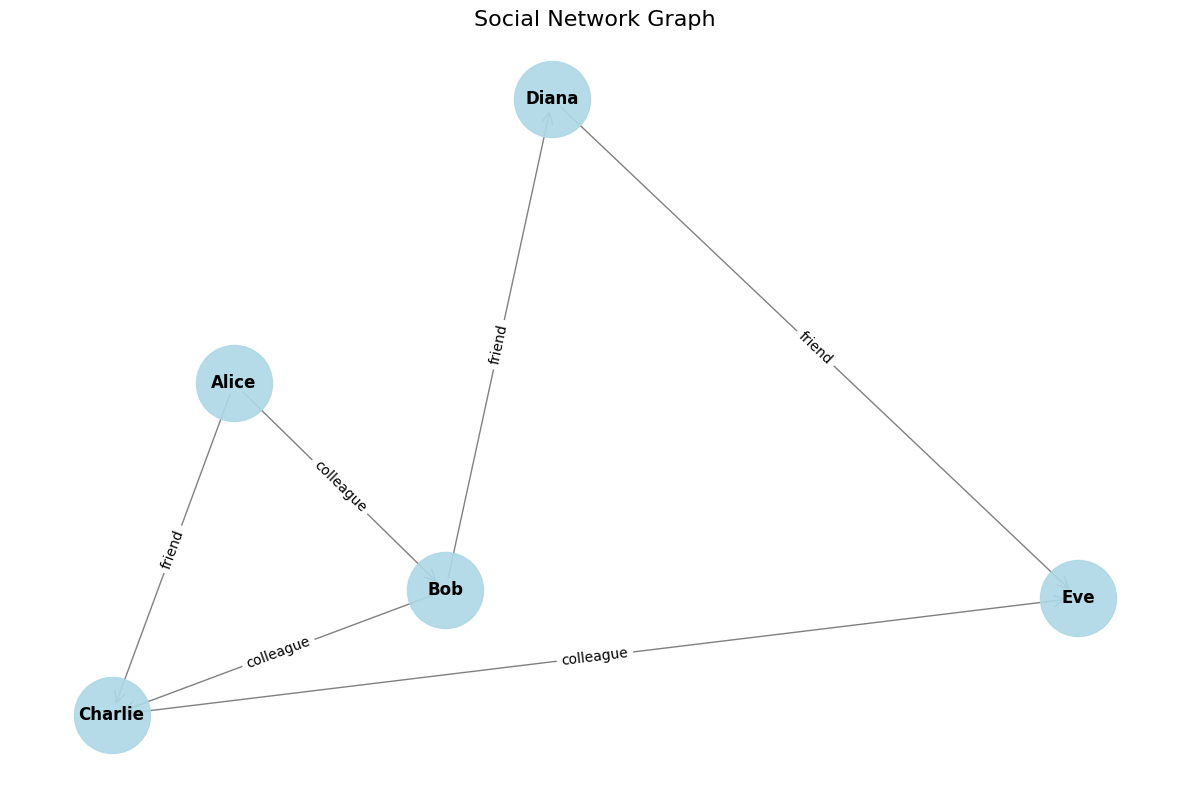

[OK] Graph has 5 nodes and 6 edges


In [7]:
# Get all nodes and edges
query = "MATCH (a:Person)-[r:KNOWS]->(b:Person) RETURN a.name as source, b.name as target, r.type as type;"
results = memgraph.execute_and_fetch(query)

# Create a NetworkX graph
G = nx.DiGraph()

for row in results:
    data = dict(row)
    G.add_edge(data['source'], data['target'], type=data['type'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=3000, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', 
                       arrows=True, arrowsize=20, arrowstyle='->')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)

plt.title("Social Network Graph", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"[OK] Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

## 7. Statistics

Let's gather some statistics about our graph.

In [8]:
# Count nodes
query = "MATCH (n:Person) RETURN count(n) as total_people;"
result = list(memgraph.execute_and_fetch(query))[0]
print(f"Total People: {result['total_people']}")

# Count relationships
query = "MATCH ()-[r:KNOWS]->() RETURN count(r) as total_relationships;"
result = list(memgraph.execute_and_fetch(query))[0]
print(f"Total Relationships: {result['total_relationships']}")

# Find person with most connections
query = """
MATCH (p:Person)-[r:KNOWS]-()
RETURN p.name as name, count(r) as connections
ORDER BY connections DESC
LIMIT 1;
"""
result = list(memgraph.execute_and_fetch(query))[0]
print(f"Most Connected Person: {result['name']} ({result['connections']} connections)")

Total People: 5
Total Relationships: 6
Most Connected Person: Charlie (3 connections)


## 8. Clean Up

Optional: Remove all data from the database.

In [10]:
# Uncomment to drop all data
memgraph.drop_database()
print("[OK] Database cleared")

[OK] Database cleared


## Summary

In this notebook, you learned how to:
1. Connect to MemGraph using GQLAlchemy
2. Create nodes and relationships
3. Query graph data
4. Visualize the graph structure
5. Gather graph statistics

Next, explore the other notebooks:
- `02-graph-queries.ipynb` - Advanced querying techniques
- `03-algorithms.ipynb` - Graph algorithms and analysis